In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk8 import rk_defect_control_perfect_first_step

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    # print("derivs", derivs)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    for this_x in xs:
        plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # ====================================== figure of satisfying global defect
    actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    hb_prime_evals = [first_deriv(x) for x in t_eval]
    plt.figure()
    plt.plot(t_eval, actual_f_evals)
    plt.plot(t_eval, hb_prime_evals)
    plt.title(f"first derivative for tol={tol}")
    plt.show()

    defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    plt.figure()
    plt.plot(t_eval, defects)
    plt.title(f"global defect for tol={tol}")
    plt.show()
    
    # ====================================== end figure of satisfying global defect

    minimum_step_size = 0.01
    defects_small_steps = []
    plt.figure()
    for (x_i, x_i_plus_1, hb) in derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append( abs(hb_prime_eval - f_eval) )
        maximum_defect = max(defects)
        # minimum_defect = min(defects)
        # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        plot_vals = [ defect/ maximum_defect for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (x_i_plus_1 - x_i < minimum_step_size):
            defects_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    plt.figure()
    for [x_axis, plot_vals] in defects_small_steps:
        plt.plot(x_axis, plot_vals)
    plt.title("plot of defects on small step sizes")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    plt.show()
    
    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.4999999999999997, 0.5000000000000003, 1.0000000000000007, 2.0, 0.5]
beta values [0.9999999999999994, 1.0000000000000002, 2.0000000000000004, 2.0000000000000013, 1.999999999999999, 1.0, 0.5, 2.0]
n_steps 19
n_successful_steps 16


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 2.0, 1.0000000000000007, 2.0000000000000013, 4.000000000000004, 1.9999999999999978, 0.9999999999999989, 1.0, 2.000000000000002]
beta values [1.999999999999999, 2.0, 2.0000000000000013, 3.9999999999999956, 4.000000000000001, 4.000000000000003, 1.0, 2.000000000000002, 1.9999999999999978, 4.0, 4.000000000000007]
n_steps 0
n_successful_steps 0

integration complete


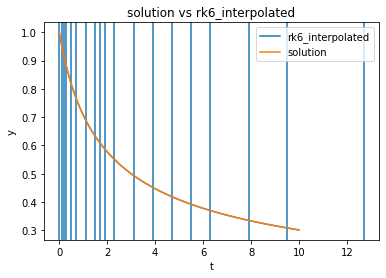

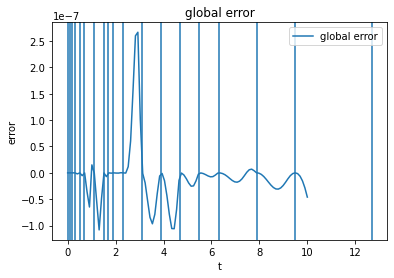

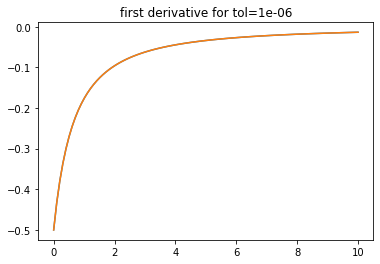

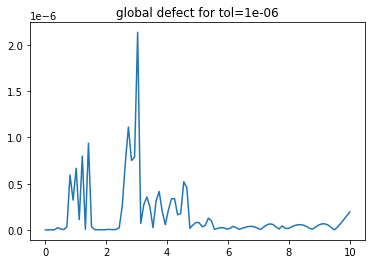

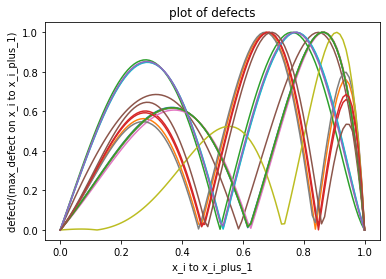

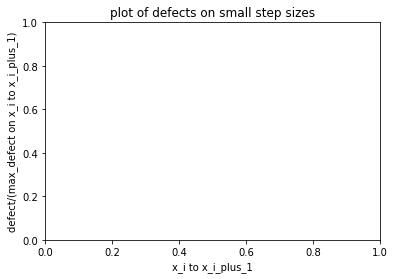

0.0
0.0
0.0
2.220446049250313e-16
4.207745263329343e-14
4.085620730620576e-14
2.720379477239021e-12
2.387756659061324e-12
2.12674322597195e-12
1.911248936892207e-12
1.584621323047486e-12
3.725963981793257e-12
3.1289415503010787e-12
2.5331958752872197e-12
2.088273998168688e-12
1.7567614030156165e-12
1.943945004967418e-12
1.5952794640838874e-12
1.4807932657845413e-11


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 2.0, 0.4999999999999997, 0.5000000000000003, 1.0000000000000007, 0.5, 1.9999999999999978, 0.5000000000000006]
beta values [0.5, 1.0000000000000002, 2.0000000000000013, 1.999999999999999, 1.0, 0.9999999999999994, 2.0, 0.5000000000000006, 1.9999999999999978]
n_steps 27
n_successful_steps 22


Monitor10
alpha values [0.9999999999999989, 1.9999999999999984, 2.0000000000000004, 1.9999999999999978, 4.000000000000004, 1.0000000000000007, 2.000000000000002, 2.0000000000000036, 1.999999999999999, 3.9999999999999956, 2.0, 1.0000000000000022]
beta values [1.0, 2.0, 2.0000000000000013, 3.9999999999999956, 2.000000000000002, 1.9999999999999978, 4.000000000000007, 3.999999999999998]
n_steps 0
n_successful_steps 0

integration complete


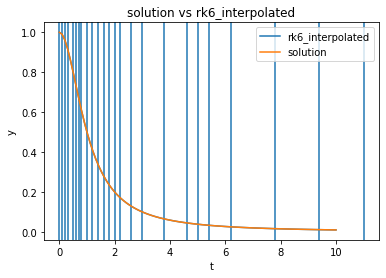

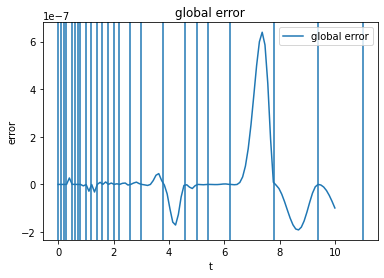

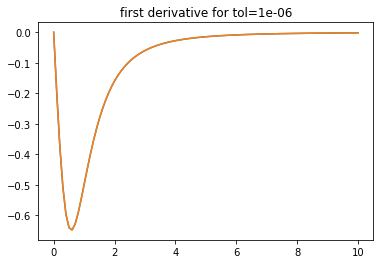

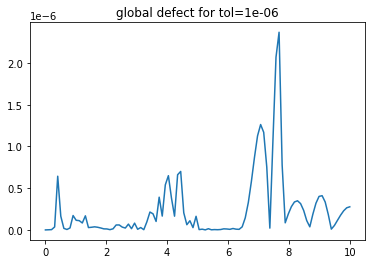

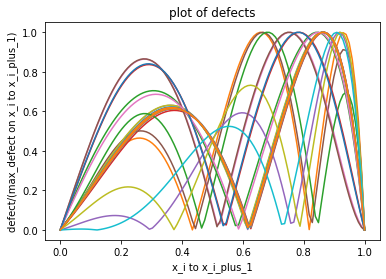

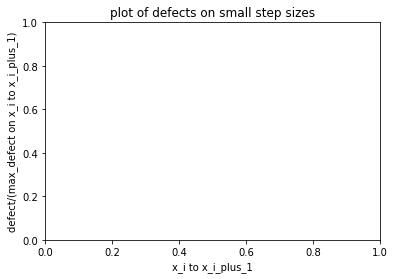

0.0
0.0
0.0
1.9317880628477724e-14
3.516087421218117e-11
2.972500023901148e-11
2.4782065288775357e-11
2.046118829923671e-11
1.548705608200862e-11
1.1002532218640226e-11
7.637446231001377e-12
5.2961524055206155e-12
3.725159070100403e-12
2.669003906774492e-12
1.949468364514928e-12
2.4283630661869893e-12
1.485811473855847e-12
1.696267848405597e-10
8.814177165916703e-11
6.40280328756404e-11
4.758315269581814e-11
2.7803887664434868e-11
4.983250270762518e-11
2.4975462670218107e-11
1.3427656556097567e-11


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.49999999999999994, 0.4999999999999999, 0.5000000000000003, 0.5000000000000001, 3.999999999999998]
beta values [0.9999999999999994, 1.9999999999999998, 1.0000000000000002, 2.0000000000000004, 1.999999999999999, 1.0, 0.4999999999999997, 0.2500000000000001, 1.9999999999999978]
n_steps 13
n_successful_steps 10


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 0.9999999999999998, 1.0000000000000007, 0.9999999999999999, 2.0, 7.999999999999996]
beta values [0.9999999999999994, 1.9999999999999996, 2.0000000000000013, 3.9999999999999996, 3.9999999999999956, 4.000000000000001, 3.999999999999999, 3.9999999999999982, 4.000000000000003, 1.999999999999999, 2.0, 0.5000000000000002]
n_steps 0
n_successful_steps 0

integration complete


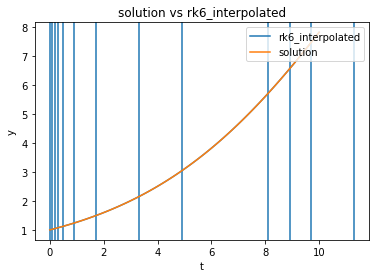

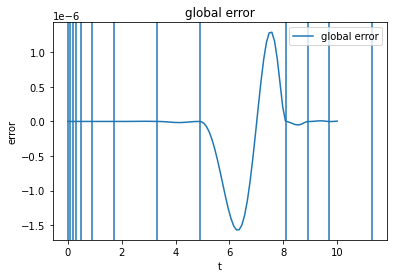

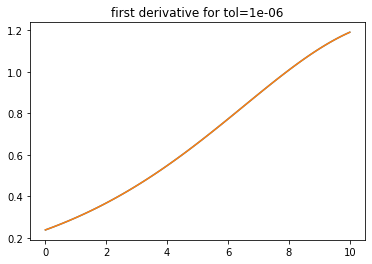

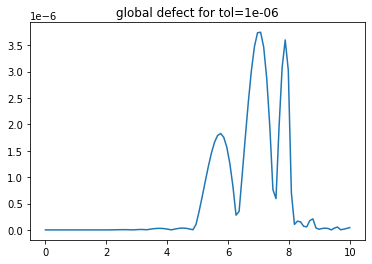

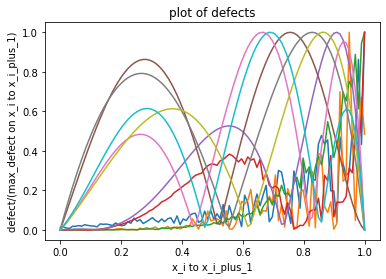

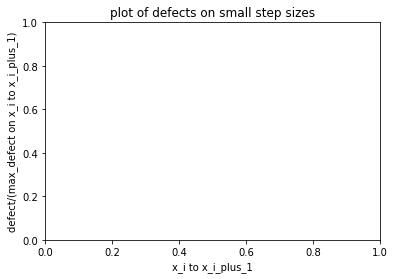

0.0
0.0
0.0
2.220446049250313e-16
4.440892098500626e-16
3.1086244689504383e-15
7.327471962526033e-15
9.561240688071848e-13
1.3216094885137863e-12
1.3731238368563936e-09
1.4839116602161084e-09
1.5756720372905875e-09
1.6717578432690061e-09


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

ZeroDivisionError: float division by zero

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 0.5000000000000006, 3.9999999999999956, 2.0, 2.000000000000009, 0.4999999999999978, 7.999999999999994, 1.0000000000000044, 4.000000000000018, 1.9999999999999645, 3.999999999999929, 1.0000000000000089, 2.000000000000142, 1.000000000000071, 4.000000000000284, 0.5000000000000089, 0.4999999999999645, 0.9999999999999822, 0.9999999999999911]
beta values [0.4999999999999999, 1.0000000000000002, 0.24999999999999994, 0.1250000000000001, 1.0, 2.0, 1.9999999999999978, 0.5000000000000006, 0.2500000000000003, 0.5, 2.000000000000009, 1.9999999999999645, 1.0000000000000089, 1.0000000000000178, 2.000000000000142, 0.5000000000000089, 0.2499999999999989, 0.4999999999999645, 0.25000000000000444, 0.9999999999999956, 1.9999999999999956, 0.24999999999998224, 0.4999999999999978, 0.999999999999929, 0.9999999999999911]
n_steps 776
n_successful_steps 556


Monitor10
alpha values [0.9999999999999911, 1.0, 2.0000000000000004, 2.0, 2.000000000000009, 3.999999999999

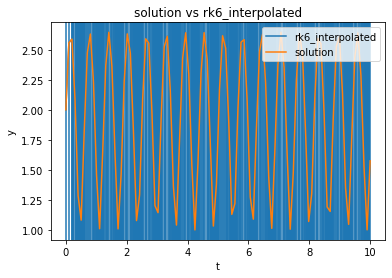

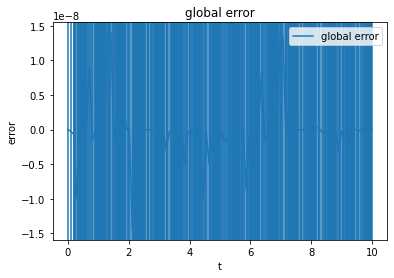

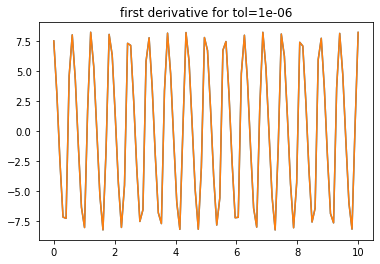

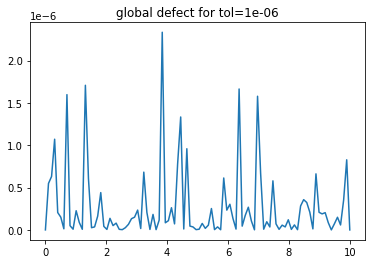

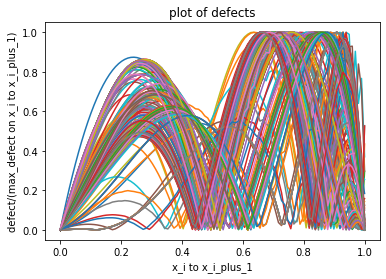

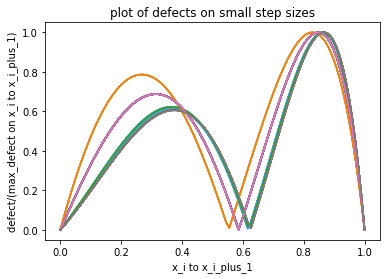

0.0
0.0
0.0
1.3322676295501878e-15
1.3322676295501878e-15
3.552713678800501e-15
4.440892098500626e-15
1.0949019468853294e-12
1.1521894549559875e-12
1.2208012378778221e-12
1.3924417174848713e-12
1.489697254442035e-12
1.5942802633617248e-12
1.7150725284409418e-12
1.8334223028659835e-12
1.944444605328499e-12
1.992850329202156e-12
2.035926982557612e-12
2.0974333381218457e-12
2.1078694345533222e-12
2.0961010704922955e-12
2.0730084315800923e-12
1.979749697511579e-12
1.865840815185038e-12
1.807887173299605e-12
1.7472689961550714e-12
1.6335821584334553e-12
1.5192291868970642e-12
1.276534433714005e-12
1.198374732780394e-12
1.1304290836733344e-12
1.070254995738651e-12
9.672262990534364e-13
8.957279362675763e-13
4.996003610813204e-13
4.813927034774679e-13
4.733990977001667e-13
4.711786516509164e-13
5.191402863147232e-13
5.901945598907332e-13
6.079581282847357e-13
6.270539643082884e-13
6.816769371198461e-13
7.542855229303314e-13
8.637535131583718e-13
9.228173780684301e-13
9.85211912052364e-13
1.05

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

In [ ]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.49999999999999994, 0.4999999999999999, 0.5000000000000003, 2.000000000000001, 0.4999999999999997, 1.0000000000000007, 1.9999999999999978, 0.5000000000000006, 2.0, 0.9999999999999989]
beta values [0.9999999999999996, 1.0000000000000002, 2.0000000000000004, 0.4999999999999998, 1.999999999999999, 1.0, 2.0000000000000013, 0.9999999999999994, 0.5000000000000006, 1.9999999999999978, 1.000000000000001, 0.5, 2.0]
n_steps 24
n_successful_steps 20


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 0.9999999999999998, 1.0000000000000007, 4.000000000000002, 1.9999999999999978, 2.000000000000002, 0.9999999999999989, 2.0000000000000036, 3.9999999999999956, 2.0, 1.0, 2.000000000000009, 1.9999999999999911, 3.9999999999999822]
beta values [0.9999999999999994, 1.999999999999999, 2.0000000000000013, 3.9999999999999996, 3.9999999999999956, 4.000000000000001, 2.0, 1.9999999999999978, 2.000000000000002, 4.0

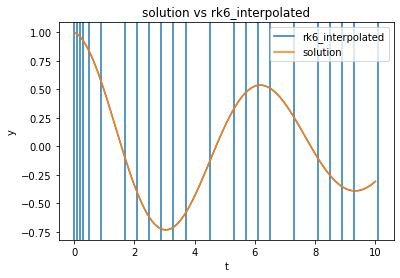

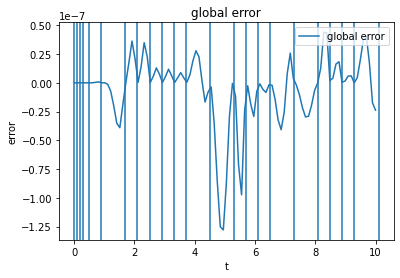

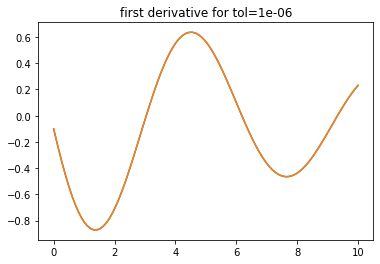

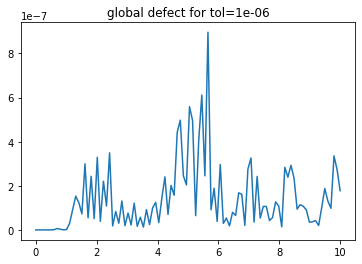

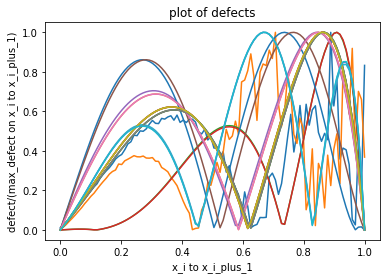

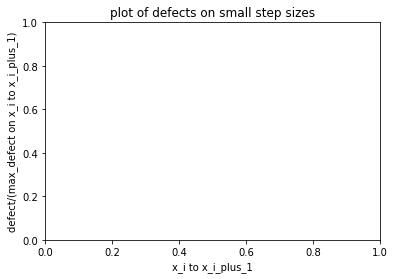

0.0
0.0
0.0
0.0
7.771561172376096e-16
4.9960036108132044e-15
2.0823481827747514e-12
2.0021762026090073e-12
1.9276802376566593e-12
1.8551826741486366e-12
1.7816859099184512e-12
1.709521413317816e-12
8.083533842295765e-13
9.79827330382932e-13
9.437450820826143e-13
9.060530103965903e-13
8.707479182135103e-13
1.3893330930159209e-12
2.162325873911186e-12
2.0760060337465802e-12
1.99390504107555e-12
1.9116375149508258e-12
2.942091015256665e-15


In [9]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

In [ ]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [ ]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)